##SVM & Naive bayes

1. What is a Support Vector Machine (SVM)?

  - Support Vector Machine (SVM) is a supervised machine learning algorithm mainly used for classification and sometimes for regression tasks. The basic idea is to find an optimal decision boundary (hyperplane) that separates data points of different classes with the maximum margin.

2. What is the difference between Hard Margin and Soft Margin SVM ?



    **Hard Margin SVM**

    * Assumes data is **perfectly linearly separable**.
    * Finds a hyperplane that separates classes with **no misclassification allowed**.
    * Very strict: works only if data has no noise or overlap.
    * Sensitive to outliers (even one misclassified point breaks the margin).

    **Soft Margin SVM**

    * Allows **some misclassification or overlap** of data points.
    * Introduces a **regularization parameter (C)** to control the trade-off between maximizing margin and minimizing error.
    * More flexible: works well with noisy or non-separable data.
    * Less sensitive to outliers compared to Hard Margin.

    **In short:**

    * *Hard Margin* = strict separation, no errors, only for clean data.
    * *Soft Margin* = allows small errors, better for real-world noisy data.



3.  What is the mathematical intuition behind SVM ?



    The goal of SVM is to find the **optimal hyperplane** that separates two classes with the **maximum margin**.

    #### 1. **Hyperplane Equation**

    A hyperplane in (n)-dimensional space is defined as:

    [
    w \cdot x + b = 0
    ]

    where:

    * (w) = weight vector (perpendicular to hyperplane)
    * (x) = input vector
    * (b) = bias term

    #### 2. **Classification Rule**

    * For class **+1**:
      [
      w \cdot x + b \geq +1
      ]

    * For class **–1**:
      [
      w \cdot x + b \leq -1
      ]

    Thus, the constraint can be written as:
    [
    y_i (w \cdot x_i + b) \geq 1 \quad \forall i
    ]

    where (y_i \in {+1, -1}).

    #### 3. **Margin**

    The distance of any point (x) from the hyperplane is:

    [
    \frac{|w \cdot x + b|}{|w|}
    ]

    The margin between the two support vectors (closest points) is:

    [
    \text{Margin} = \frac{2}{|w|}
    ]

    So, maximizing the margin is equivalent to **minimizing** (|w|).


    #### 4. **Optimization Problem**

    The SVM optimization can be formulated as:

    [
    \min_{w,b} \ \frac{1}{2} |w|^2
    ]

    subject to:

    [
    y_i (w \cdot x_i + b) \geq 1, \quad \forall i
    ]



    #### 5. **Soft Margin (with Slack Variable (\xi))**

    When data is not perfectly separable:

    [
    y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
    ]

    Objective becomes:

    [
    \min_{w,b} \ \frac{1}{2} |w|^2 + C \sum_{i=1}^n \xi_i
    ]

    where (C) is the penalty parameter controlling trade-off between margin size and classification error.


4.  What is the role of Lagrange Multipliers in SVM ?


    In Support Vector Machines (SVM), Lagrange multipliers play a crucial role in solving the optimization problem of finding the maximum-margin hyperplane. The original problem is a constrained optimization task, where each training point must satisfy the condition (y_i(w \cdot x_i + b) \geq 1). To handle this, Lagrange multipliers (\alpha_i) are introduced for each constraint, leading to the construction of the Lagrangian function. By applying the Karush-Kuhn-Tucker (KKT) conditions, it is found that the optimal weight vector (w) can be expressed as a linear combination of training samples, weighted by their corresponding multipliers. Importantly, only the points with non-zero multipliers become support vectors, meaning they define the decision boundary. Thus, Lagrange multipliers not only help in transforming the constrained problem into a dual optimization problem but also enable the use of the kernel trick, since the dual formulation depends only on dot products of data points. In essence, they identify the critical points (support vectors) and make SVM computationally efficient for both linear and non-linear classification.

5. What are Support Vectors in SVM ?

    In Support Vector Machines (SVM), support vectors are the data points that lie closest to the decision boundary (or hyperplane) and directly influence its position and orientation. These points are critical because the margin of separation is defined by them, and removing or changing them would alter the hyperplane. In contrast, data points far away from the boundary do not affect the classifier. Support vectors are associated with non-zero Lagrange multipliers in the optimization process, and they are the only points used in constructing the final decision function. Thus, support vectors are the “most informative” training examples that determine the maximum-margin hyperplane in SVM.

6. What is a Support Vector Classifier (SVC) ?


    A **Support Vector Classifier (SVC)** is an extension of Support Vector Machine designed to handle datasets that are **not perfectly linearly separable**. Unlike the hard-margin SVM, SVC introduces a **soft margin** that allows some misclassification of training points. Mathematically, this is done by adding **slack variables (\xi_i \geq 0)** for each data point, modifying the constraint as:

    [
    y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \forall i
    ]

    The objective function becomes:

    [
    \min_{w,b} \ \frac{1}{2} |w|^2 + C \sum_{i=1}^n \xi_i
    ]

    where (C > 0) is the **regularization parameter** that controls the trade-off between maximizing the margin and minimizing classification errors. By solving this optimization problem, SVC finds the **optimal hyperplane** that separates the classes as well as possible while tolerating some errors, making it effective for real-world noisy or overlapping datasets.


7. What is a Support Vector Regressor (SVR) ?



    A **Support Vector Regressor (SVR)** is the regression counterpart of SVM, used to predict continuous numerical values instead of class labels. SVR tries to find a function (f(x) = w \cdot x + b) that **deviates from the actual target (y_i) by at most (\varepsilon)** for all training points while keeping the model as flat as possible. Mathematically, the constraints are expressed as:

    [
    y_i - (w \cdot x_i + b) \leq \varepsilon \quad \text{and} \quad (w \cdot x_i + b) - y_i \leq \varepsilon
    ]

    To allow some errors for points outside the (\varepsilon)-tube, **slack variables (\xi_i, \xi_i^*\ge 0)** are introduced, and the optimization problem becomes:

    [
    \min_{w,b} \ \frac{1}{2} |w|^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*)
    ]

    subject to:

    [
    y_i - (w \cdot x_i + b) \leq \varepsilon + \xi_i, \quad (w \cdot x_i + b) - y_i \leq \varepsilon + \xi_i^*, \quad \xi_i, \xi_i^* \ge 0
    ]

    Here, (C) is the **regularization parameter** controlling the trade-off between flatness and tolerance for deviations. In essence, SVR constructs a regression model that predicts values with a margin of tolerance (\varepsilon) while minimizing the model complexity, making it robust to outliers and noise.



8. What is the Kernel Trick in SVM ?

    The **Kernel Trick** in **Support Vector Machines (SVM)** is a method that allows SVM to perform **non-linear classification** efficiently without explicitly transforming the data into a higher-dimensional space. Here's a concise explanation:

    * SVM works by finding a hyperplane that separates classes. For **linearly separable data**, this is straightforward.
    * For **non-linearly separable data**, mapping the data to a higher-dimensional space may make it linearly separable. But computing this mapping explicitly can be **computationally expensive**.

    **Kernel Trick Concept:**
    Instead of explicitly mapping data to a high-dimensional space, SVM uses a **kernel function** (K(x_i, x_j)) that computes the **dot product in the high-dimensional space** directly. This allows SVM to find the separating hyperplane in that space **without actually transforming the data**.


9.  Compare Linear Kernel, Polynomial Kernel, and RBF Kernel ?



    ### **1. Linear Kernel**

    * **Equation:** ( K(x_i, x_j) = x_i \cdot x_j )
    * **Decision boundary:** Straight line (or flat hyperplane)
    * **Best for:** Data that is already linearly separable
    * **Pros:** Fast, simple, works well in high-dimensional spaces
    * **Cons:** Cannot handle curved/non-linear patterns


    ### **2. Polynomial Kernel**

    * **Equation:** ( K(x_i, x_j) = (x_i \cdot x_j + c)^d )
    * **Decision boundary:** Curved (depends on degree (d))
    * **Best for:** Moderately complex non-linear data
    * **Pros:** Can model curves, more flexible than linear
    * **Cons:** Can overfit if degree (d) is too high; slower than linear


    ### **3. RBF (Radial Basis Function) Kernel**

    * **Equation:** ( K(x_i, x_j) = \exp(-\gamma |x_i - x_j|^2) )
    * **Decision boundary:** Highly flexible, can form any shape
    * **Best for:** Complex non-linear data
    * **Pros:** Very powerful, most commonly used
    * **Cons:** Sensitive to (\gamma) and (C); requires careful tuning


    **Intuition in 1 line:**

    * Linear → Straight line
    * Polynomial → Curved line
    * RBF → Flexible, blobs and twists

10. What is the effect of the C parameter in SVM ?

    The **C parameter** in **SVM** is the **regularization parameter** that controls the trade-off between **maximizing the margin** and **minimizing classification error**. Here’s the effect explained clearly:


    ### **1. High C (C is large)**

    * SVM tries to **correct all misclassified points**.
    * The model becomes **less tolerant of errors** → smaller margin.
    * Effect: **Low bias, high variance** (can overfit).
    * Use when: You want **accurate classification on training data**.


    ### **2. Low C (C is small)**

    * SVM allows **some misclassifications** to achieve a **wider margin**.
    * The model is **more tolerant of errors** → larger margin.
    * Effect: **High bias, low variance** (more generalization).
    * Use when: You want **better generalization on unseen data**.

    **Intuition:**

    * **C = penalty for misclassification**
    * **High C → punish errors heavily → tight fit**
    * **Low C → tolerate errors → smoother fit**


11. What is the role of the Gamma parameter in RBF Kernel SVM ?

    The **Gamma (γ) parameter** in **RBF (Radial Basis Function) Kernel SVM** controls the **influence of a single training example** on the decision boundary. Here’s the effect clearly:

    ### **1. High Gamma (γ is large)**

    * Each point has **very small influence** → the decision boundary tries to fit **very closely around training points**.
    * Effect: **Tight, wiggly boundary** → can **overfit** the data.
    * Use when: You want to capture **very fine details**, but risky for generalization.

    ### **2. Low Gamma (γ is small)**

    * Each point has **wide influence** → the decision boundary is **smoother**.
    * Effect: **Wide, smooth boundary** → may **underfit** if too small.
    * Use when: You want a **generalized model**, less sensitive to noise.


    **Intuition:**

    * Gamma controls **“reach” or “spread”** of a training point’s influence:

      * High γ → small reach → model reacts to every point
      * Low γ → large reach → model smooths out differences

12. What is the Naïve Bayes classifier, and why is it called "Naïve" ?

    ### **Naïve Bayes Classifier**

    * It is a **probabilistic classifier** based on **Bayes’ Theorem**.
    * It predicts the **probability that a data point belongs to a class**.
    * Formula:

    [
    P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
    ]

    Where:

    * (C) = class
    * (X) = feature vector
    * (P(C|X)) = probability of class (C) given features (X)
    * (P(X|C)) = likelihood of features given class
    * (P(C)) = prior probability of the class
    * (P(X)) = probability of the features


    ### **Why is it called “Naïve”?**

    * It **assumes that all features are independent** of each other given the class.
    * In reality, features often **correlate**, so the independence assumption is **“naïve”**


13. What is Bayes’ Theorem ?


    ### **Bayes’ Theorem**

    Bayes’ Theorem is a **fundamental formula in probability** that relates the **conditional probability** of an event based on prior knowledge of related events.

    **Formula:**

    [
    P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
    ]

    Where:

    * (P(A|B)) = probability of **event A** given **event B** has occurred (posterior probability)
    * (P(B|A)) = probability of **event B** given **event A** has occurred (likelihood)
    * (P(A)) = probability of **event A** (prior probability)
    * (P(B)) = probability of **event B** (normalizing factor)

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes


    ### **1. Gaussian Naïve Bayes**

    * **Feature type:** Continuous numbers (real values)
    * **Assumption:** Data follows a **normal (bell curve) distribution**
    * **Use case:** Predicting height, weight, test scores, or any real-valued features
    * **Example:** Predicting if a patient has diabetes based on blood sugar levels


    ### **2. Multinomial Naïve Bayes**

    * **Feature type:** Counts (integer values)
    * **Assumption:** Features represent **frequencies or counts**
    * **Use case:** Text classification where **word frequency matters**
    * **Example:** Classifying emails as spam based on how often certain words appear


    ### **3. Bernoulli Naïve Bayes**

    * **Feature type:** Binary (0/1, yes/no)
    * **Assumption:** Features represent **presence or absence**
    * **Use case:** Text classification where **only presence of a word matters**, or other yes/no data
    * **Example:** Classifying emails as spam based on whether certain words appear (ignoring frequency)

15. When should you use Gaussian Naïve Bayes over other variants ?

    **Gaussian Naïve Bayes** when your dataset has **continuous numeric features** that are **approximately normally distributed**.

    ### **Key Points:**

    1. **Feature Type:** Continuous real-valued data (e.g., height, weight, temperature, test scores).
    2. **Independence:** Works best when features are **independent** or approximately independent.
    3. **Dataset Size:** Performs well on **small to medium datasets**.
    4. **Output Needed:** Useful when you want **probabilities of class membership**, not just labels.

    ### **Avoid Gaussian NB When:**

    * Features are counts (use **Multinomial NB**)
    * Features are binary/presence-absence (use **Bernoulli NB**)

    **Example:** Predicting whether a patient has diabetes based on lab results like glucose level, BMI, and blood pressure → **Gaussian NB** is appropriate.


16. What are the key assumptions made by Naïve Bayes ?


    ### **1. Feature Independence**

    * All features are assumed to be **independent of each other given the class**.
    * Example: In spam detection, the presence of the word “offer” is assumed independent of the word “free,” given the email is spam.
    * **Why it’s “naïve”:** Because in reality, features often correlate.


    ### **2. Feature Relevance**

    * All features are **equally important** for predicting the class.
    * Each feature contributes independently to the final probability.

    ### **3. Conditional Probability**

    * The model relies on **conditional probabilities** (P(x_i | C)) of features given the class.
    * Assumes that these probabilities can be estimated from the training data.


    ### **4. Data Type Assumptions (Variant-specific)**

    * **Gaussian NB:** Features are continuous and follow a **normal distribution**.
    * **Multinomial NB:** Features are **counts** (integers).
    * **Bernoulli NB:** Features are **binary** (0/1, presence/absence).



17. What are the advantages and disadvantages of Naïve Bayes ?

    ### **Advantages**

    1. **Simple and Fast**

        * Easy to implement and requires **less training time**.

    2. **Works Well on Small Datasets**

        * Can perform surprisingly well even with limited data.

    3. **Handles High-Dimensional Data**

        * Performs well when there are **many features**, like text classification.

    4. **Probabilistic Output**

        * Provides **class probabilities**, not just labels.

    5. **Robust to Irrelevant Features**

        * Irrelevant features do not significantly affect performance.


    ### **Disadvantages**

    1. **Assumes Feature Independence**

        * Rarely true in real-world data; correlated features can reduce accuracy.

    2. **Zero Probability Problem**

        * If a feature value never appears in the training set for a class, probability becomes zero (solved using **Laplace smoothing**).

    3. **Not Ideal for Complex Relationships**

        * Cannot capture **non-linear feature interactions** well.

    4. **Requires Correct Data Type per Variant**

        * Gaussian NB → continuous, Multinomial NB → counts, Bernoulli NB → binary.



18. Why is Naïve Bayes a good choice for text classification ?

    **Naïve Bayes is a good choice for text classification** because of several key reasons:


    ### **1. Handles High-Dimensional Data Well**

    * Text data often has **thousands of features** (words).
    * Naïve Bayes can efficiently handle this because it treats **each word independently**.


    ### **2. Works with Sparse Data**

    * Most documents contain only a **small subset of all possible words**.
    * Naïve Bayes can handle **sparse vectors** without performance issues.


    ### **3. Fast and Scalable**

    * Training and prediction are **very fast**, even on large text datasets.
    * Suitable for real-time applications like spam detection or sentiment analysis.


    ### **4. Probabilistic Output**

    * Provides **probabilities for each class**, which helps in ranking or threshold-based classification.

    ### **5. Performs Well Despite “Naïve” Assumption**

    * Even though it **assumes word independence**, it often achieves **high accuracy** in text classification.

    **Example Applications:**

    * Spam vs. ham email detection
    * Sentiment analysis (positive/negative reviews)
    * News article categorization


19. Compare SVM and Naïve Bayes for classification tasks.

    ### **1. Approach**

    * **SVM:** Draws the **best boundary** (hyperplane) between classes.
    * **Naïve Bayes:** Calculates **probabilities** of each class and picks the most likely.


    ### **2. Feature Assumptions**

    * **SVM:** No assumptions about feature independence.
    * **Naïve Bayes:** Assumes features are **independent** given the class.


    ### **3. Data Type**

    * **SVM:** Works with **continuous and encoded categorical features**.
    * **Naïve Bayes:** Depends on variant:

      * Gaussian → continuous
      * Multinomial → counts
      * Bernoulli → binary


    ### **4. Non-Linearity**

    * **SVM:** Handles non-linear data with **kernels**.
    * **Naïve Bayes:** Mostly linear, works best when features are independent.


    ### **5. Speed and Scalability**

    * **SVM:** Slower on large datasets, more computationally intensive.
    * **Naïve Bayes:** Very fast, scalable to huge datasets like text classification.


    ### **6. Use Cases**

    * **SVM:** Image recognition, complex classification tasks.
    * **Naïve Bayes:** Spam detection, sentiment analysis, document classification.


20. How does Laplace Smoothing help in Naïve Bayes ?

    **Laplace Smoothing** (also called **add-one smoothing**) helps **Naïve Bayes** handle the **zero probability problem**. Here's a clear explanation:


    ### **Problem it Solves**

    * In Naïve Bayes, the probability of a class given a feature is:

    [
    P(x_i|C) = \frac{\text{count of } x_i \text{ in class } C}{\text{total count in class } C}
    ]

    * If a **feature value never appears in the training data for a class**, the numerator is **0**, making the **entire probability zero**.
    * This is called the **zero-frequency problem**.


    ### **How Laplace Smoothing Works**

    * Add **1** (or a small value) to every feature count:

    [
    P(x_i|C) = \frac{\text{count of } x_i \text{ in class } C + 1}{\text{total count in class } C + V}
    ]

    Where (V) = **number of possible feature values**.

    * This ensures **no probability is ever zero**, even for unseen features.


    ### **Example**

    * Spam classification:

      * A new word “blockchain” appears in an email, but it **never occurred in spam emails in training**.
      * Without smoothing → probability becomes 0 → misclassification.
      * With Laplace smoothing → small non-zero probability → model handles it gracefully.



##Practical

In [2]:
#21.Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 100.00%

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [3]:
#22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

wine = datasets.load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Linear SVM Accuracy: {accuracy_linear*100:.2f}%")
print(f"RBF SVM Accuracy: {accuracy_rbf*100:.2f}%\n")

print("Linear SVM Classification Report:")
print(classification_report(y_test, y_pred_linear))
print("RBF SVM Classification Report:")
print(classification_report(y_test, y_pred_rbf))


Linear SVM Accuracy: 100.00%
RBF SVM Accuracy: 80.56%

Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

RBF SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



In [7]:
#23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1)).ravel()

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

svr.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = svr.predict(X_test_scaled)

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 0.33


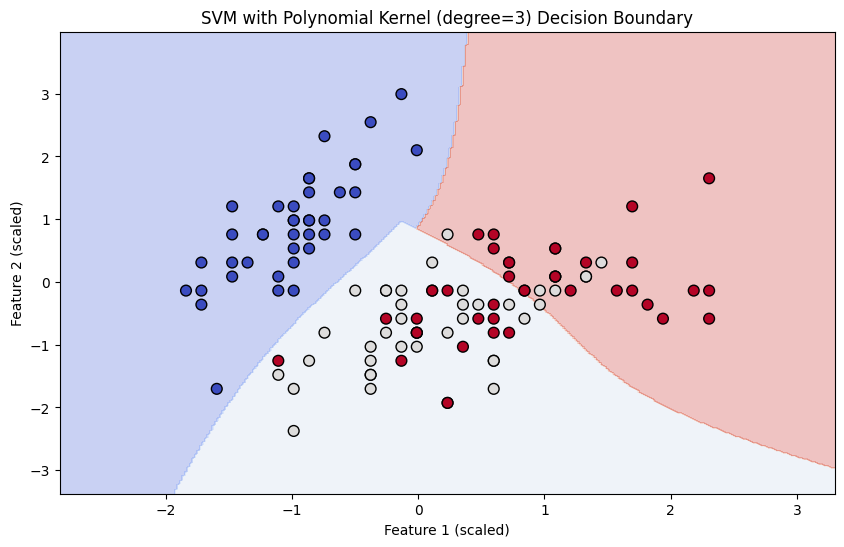

In [8]:
#24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', coef0=1, random_state=42)
svm_poly.fit(X_train_scaled, y_train)

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=60, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('SVM with Polynomial Kernel (degree=3) Decision Boundary')
plt.show()


In [9]:
#25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 97.37%

Confusion Matrix:
[[40  3]
 [ 0 71]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [10]:
#26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

X = newsgroups.data
y = newsgroups.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

mnb = MultinomialNB()

mnb.fit(X_train_tfidf, y_train)

y_pred = mnb.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Accuracy: 97.60%

Confusion Matrix:
[[164   1   2   0]
 [  2 186   2   1]
 [  1   2 198   0]
 [  2   1   3 143]]

Classification Report:
                    precision    recall  f1-score   support

       alt.atheism       0.97      0.98      0.98       167
     comp.graphics       0.98      0.97      0.98       191
           sci.med       0.97      0.99      0.98       201
talk.politics.misc       0.99      0.96      0.98       149

          accuracy                           0.98       708
         macro avg       0.98      0.98      0.98       708
      weighted avg       0.98      0.98      0.98       708



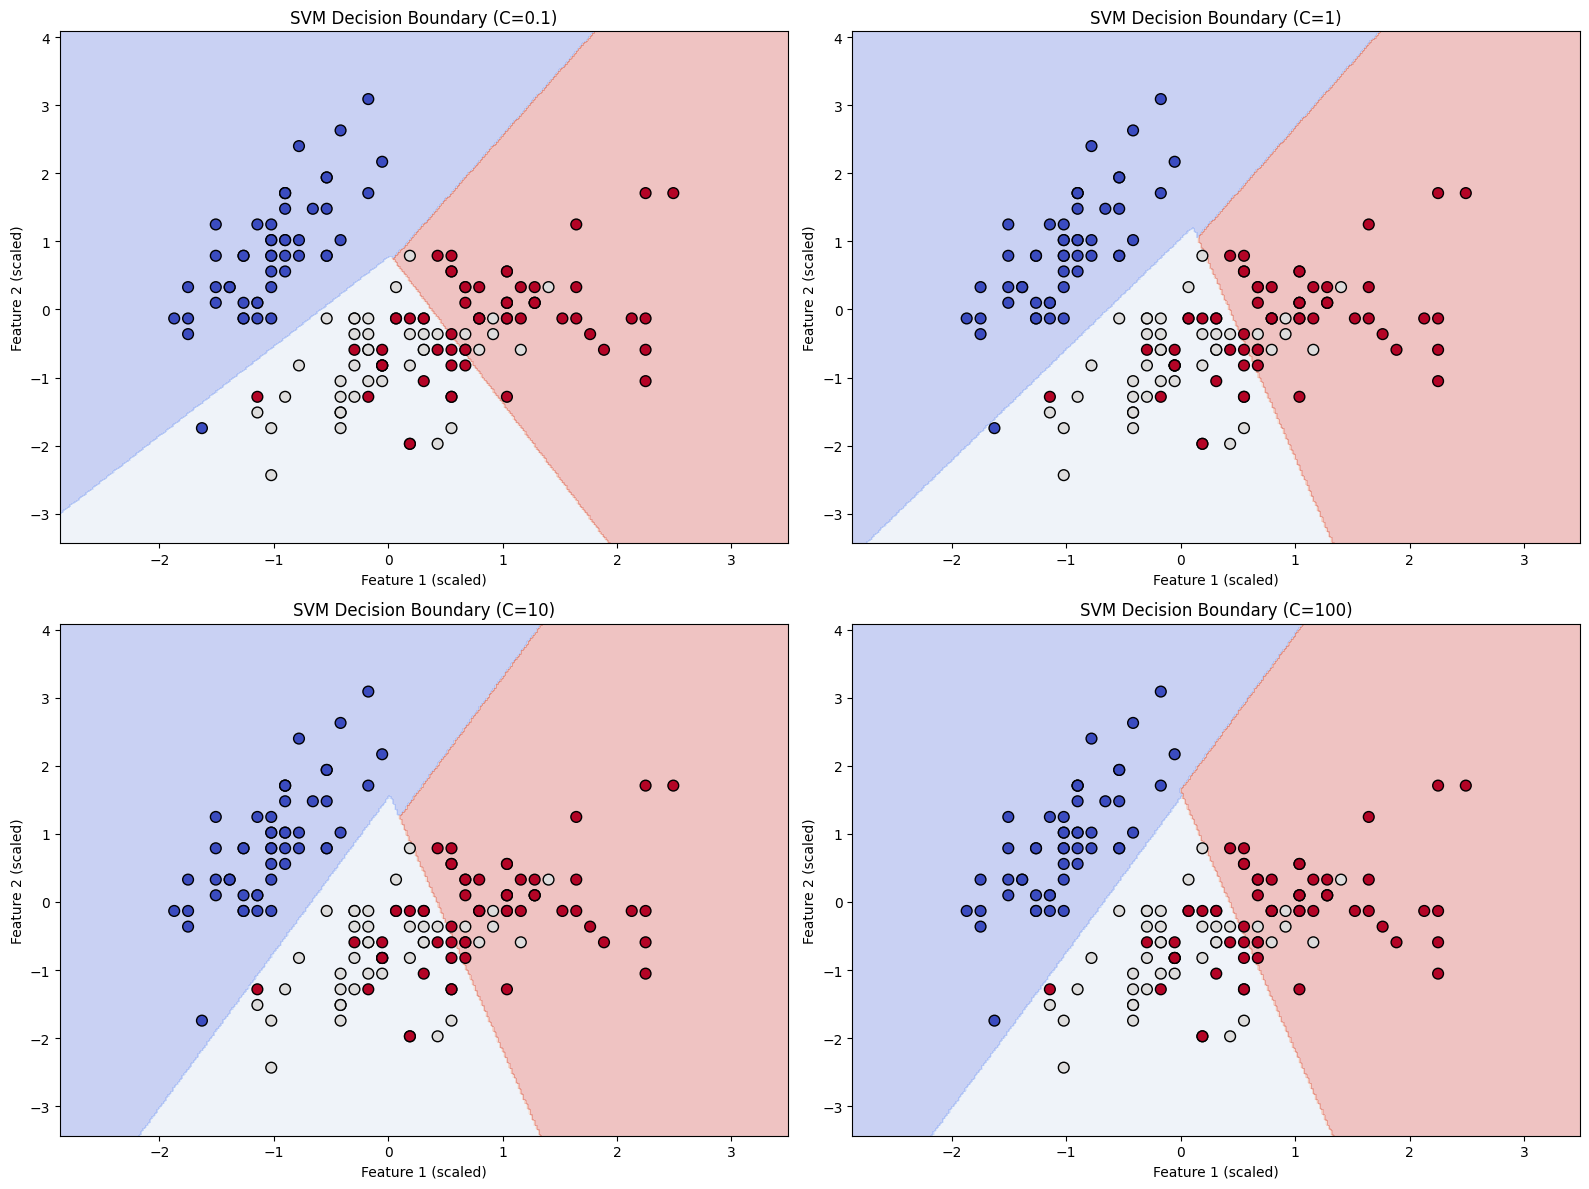

In [11]:
#27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C_values = [0.1, 1, 10, 100]


x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

plt.figure(figsize=(16, 12))
for i, C in enumerate(C_values):
    svm_clf = SVC(kernel='linear', C=C, random_state=42)
    svm_clf.fit(X_scaled, y)


    Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 2, i+1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=60, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f"SVM Decision Boundary (C={C})")
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')

plt.tight_layout()
plt.show()


In [12]:
#28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X, y = make_classification(n_samples=500, n_features=10, n_informative=8,
                           n_redundant=0, n_classes=2, random_state=42)

X_binary = (X > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

bnb = BernoulliNB()

bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 68.00%

Confusion Matrix:
[[34 15]
 [17 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        49
           1       0.69      0.67      0.68        51

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.68      0.68      0.68       100



In [13]:
#29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_unscaled = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy WITHOUT scaling: {accuracy_unscaled*100:.2f}%")
print(f"Accuracy WITH scaling   : {accuracy_scaled*100:.2f}%")


Accuracy WITHOUT scaling: 100.00%
Accuracy WITH scaling   : 100.00%


In [14]:
#30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X, y = make_classification(n_samples=500, n_features=10, n_informative=8,
                           n_redundant=0, n_classes=2, random_state=42)

X_counts = (X - X.min()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.2, random_state=42)

mnb_no_smooth = MultinomialNB(alpha=0.0)
mnb_no_smooth.fit(X_train, y_train)
y_pred_no_smooth = mnb_no_smooth.predict(X_test)
accuracy_no_smooth = accuracy_score(y_test, y_pred_no_smooth)

mnb_smooth = MultinomialNB(alpha=1.0)
mnb_smooth.fit(X_train, y_train)
y_pred_smooth = mnb_smooth.predict(X_test)
accuracy_smooth = accuracy_score(y_test, y_pred_smooth)

print(f"Accuracy WITHOUT Laplace smoothing: {accuracy_no_smooth*100:.2f}%")
print(f"Accuracy WITH Laplace smoothing   : {accuracy_smooth*100:.2f}%\n")

print("Classification Report WITH Laplace smoothing:")
print(classification_report(y_test, y_pred_smooth))


Accuracy WITHOUT Laplace smoothing: 69.00%
Accuracy WITH Laplace smoothing   : 69.00%

Classification Report WITH Laplace smoothing:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        49
           1       0.69      0.71      0.70        51

    accuracy                           0.69       100
   macro avg       0.69      0.69      0.69       100
weighted avg       0.69      0.69      0.69       100



In [15]:
#31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}


grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2)

grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

In [16]:
#32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                           n_redundant=0, n_classes=2, weights=[0.9, 0.1],
                           flip_y=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_default = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_default.fit(X_train, y_train)
y_pred_default = svm_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

print("SVM WITHOUT class weighting:")
print(f"Accuracy: {accuracy_default*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_default))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))
print("\n" + "-"*60 + "\n")

svm_weighted = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

print("SVM WITH class weighting:")
print(f"Accuracy: {accuracy_weighted*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_weighted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))


SVM WITHOUT class weighting:
Accuracy: 95.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       182
           1       1.00      0.44      0.62        18

    accuracy                           0.95       200
   macro avg       0.97      0.72      0.79       200
weighted avg       0.95      0.95      0.94       200

Confusion Matrix:
 [[182   0]
 [ 10   8]]

------------------------------------------------------------

SVM WITH class weighting:
Accuracy: 96.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       182
           1       0.75      0.83      0.79        18

    accuracy                           0.96       200
   macro avg       0.87      0.90      0.88       200
weighted avg       0.96      0.96      0.96       200

Confusion Matrix:
 [[177   5]
 [  3  15]]


In [17]:
#33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

data['label_num'] = data.label.map({'ham':0, 'spam':1})

X = data['message']
y = data['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

mnb = MultinomialNB()

mnb.fit(X_train_tfidf, y_train)

y_pred = mnb.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 96.68%

Confusion Matrix:
[[966   0]
 [ 37 112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [18]:
#34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
y_pred_gnb = gnb_clf.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

print(f"SVM Accuracy: {accuracy_svm*100:.2f}%")
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb*100:.2f}%\n")

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))


SVM Accuracy: 100.00%
Gaussian Naive Bayes Accuracy: 100.00%

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
#35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb_full = GaussianNB()
gnb_full.fit(X_train, y_train)
y_pred_full = gnb_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

selector = SelectKBest(score_func=f_classif, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

gnb_selected = GaussianNB()
gnb_selected.fit(X_train_selected, y_train)
y_pred_selected = gnb_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"Accuracy WITHOUT feature selection: {accuracy_full*100:.2f}%")
print(f"Accuracy WITH feature selection   : {accuracy_selected*100:.2f}%\n")

print("Classification Report WITH feature selection:")
print(classification_report(y_test, y_pred_selected))


Accuracy WITHOUT feature selection: 100.00%
Accuracy WITH feature selection   : 100.00%

Classification Report WITH feature selection:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:
#36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report

wine = datasets.load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_ovr = OneVsRestClassifier(SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))
svm_ovr.fit(X_train_scaled, y_train)
y_pred_ovr = svm_ovr.predict(X_test_scaled)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

svm_ovo = OneVsOneClassifier(SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))
svm_ovo.fit(X_train_scaled, y_train)
y_pred_ovo = svm_ovo.predict(X_test_scaled)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"One-vs-Rest (OvR) Accuracy: {accuracy_ovr*100:.2f}%")
print(f"One-vs-One (OvO) Accuracy  : {accuracy_ovo*100:.2f}%\n")

print("OvR Classification Report:")
print(classification_report(y_test, y_pred_ovr, target_names=wine.target_names))

print("OvO Classification Report:")
print(classification_report(y_test, y_pred_ovo, target_names=wine.target_names))



One-vs-Rest (OvR) Accuracy: 100.00%
One-vs-One (OvO) Accuracy  : 100.00%

OvR Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

OvO Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [21]:
#37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kernels = ['linear', 'poly', 'rbf']

accuracies = {}

for kernel in kernels:
    svm_clf = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    svm_clf.fit(X_train_scaled, y_train)
    y_pred = svm_clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies[kernel] = acc
    print(f"SVM with {kernel} kernel Accuracy: {acc*100:.2f}%")
    print(f"Classification Report ({kernel} kernel):\n{classification_report(y_test, y_pred)}\n")

print("Summary of Accuracies:")
for k, v in accuracies.items():
    print(f"{k.capitalize()} kernel: {v*100:.2f}%")


SVM with linear kernel Accuracy: 95.61%
Classification Report (linear kernel):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


SVM with poly kernel Accuracy: 86.84%
Classification Report (poly kernel):
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        43
           1       0.83      1.00      0.90        71

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114


SVM with rbf kernel Accuracy: 98.25%
Classification Report (rbf kernel):
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
        

In [22]:
#38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(svm_clf, X_scaled, y, cv=skf, scoring='accuracy')

average_accuracy = np.mean(scores)

print(f"Accuracies for each fold: {scores}")
print(f"Average Accuracy: {average_accuracy*100:.2f}%")


Accuracies for each fold: [1.         0.96666667 0.9        1.         0.9       ]
Average Accuracy: 95.33%


In [23]:
#39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

priors_list = [
    None,
    [1/3, 1/3, 1/3],
    [0.5, 0.3, 0.2]
]

for i, priors in enumerate(priors_list):
    gnb = GaussianNB(priors=priors)
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Scenario {i+1}: Priors = {priors}")
    print(f"Accuracy: {accuracy*100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-"*60)


Scenario 1: Priors = None
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

------------------------------------------------------------
Scenario 2: Priors = [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.0

In [24]:
#40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred_full = svm_clf.predict(X_test_scaled)
accuracy_full = accuracy_score(y_test, y_pred_full)

rfe_selector = RFE(estimator=SVC(kernel='linear'), n_features_to_select=2)
rfe_selector.fit(X_train_scaled, y_train)

X_train_rfe = rfe_selector.transform(X_train_scaled)
X_test_rfe = rfe_selector.transform(X_test_scaled)

svm_rfe = SVC(kernel='linear', C=1.0, random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

print(f"Accuracy WITHOUT RFE: {accuracy_full*100:.2f}%")
print(f"Accuracy WITH RFE   : {accuracy_rfe*100:.2f}%\n")

print("Classification Report WITH RFE:")
print(classification_report(y_test, y_pred_rfe))


Accuracy WITHOUT RFE: 96.67%
Accuracy WITH RFE   : 100.00%

Classification Report WITH RFE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
#41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision*100:.2f}%")
print(f"Recall:    {recall*100:.2f}%")
print(f"F1-Score:  {f1*100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Precision: 97.26%
Recall:    100.00%
F1-Score:  98.61%

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [26]:
#42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

iris = datasets.load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_prob = gnb.predict_proba(X_test)

loss = log_loss(y_test, y_prob)
print(f"Log Loss (Cross-Entropy Loss): {loss:.4f}")


Log Loss (Cross-Entropy Loss): 0.0263


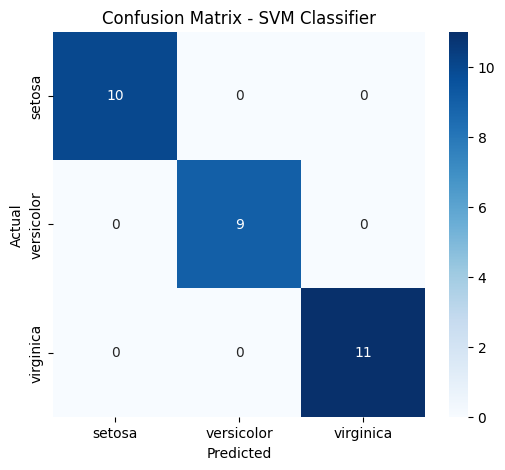

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [27]:
#43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


In [28]:
#44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = svr.predict(X_test_scaled)

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 0.3739


ROC-AUC Score: 0.9984


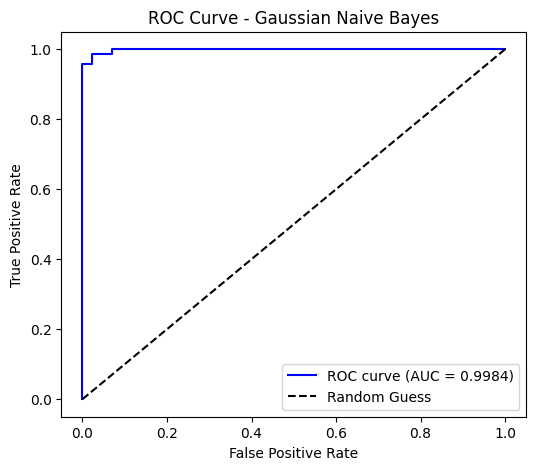

In [29]:
#45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_prob = gnb.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()


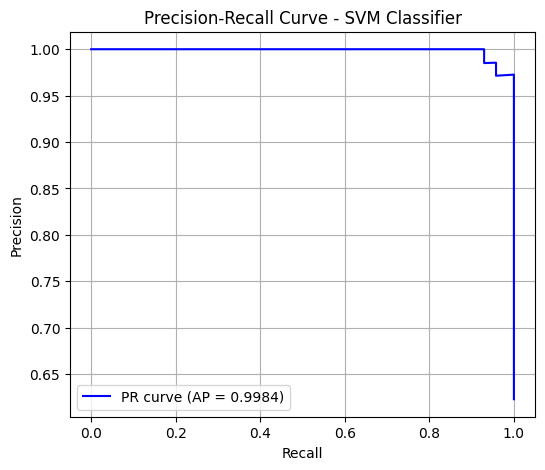

In [30]:
#46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_prob = svm_clf.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'PR curve (AP = {avg_precision:.4f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM Classifier')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
